In [1]:
import numpy as np

In [2]:
z = np.load('style_4layer.npz')
z.keys()

['conv4.bias',
 'conv4.weight',
 'conv3.bias',
 'conv3.weight',
 'conv2.bias',
 'conv2.weight',
 'conv1.bias',
 'conv1.weight']

In [3]:
w_conv1 = z['conv1.weight']
b_conv1 = z['conv1.bias']
w_conv2 = z['conv2.weight']
b_conv2 = z['conv2.bias']
w_conv3 = z['conv3.weight']
b_conv3 = z['conv3.bias']
w_conv4 = z['conv4.weight']
b_conv4 = z['conv4.bias']

In [4]:
from cs231n.fast_layers import conv_forward_im2col
conv_forward_fast = conv_forward_im2col

In [5]:
from PIL import Image
im = np.asarray(Image.open('before.jpg').resize((128, 128)), dtype=np.float32)
im = im[np.newaxis, :, :, :].transpose(0, 3, 1, 2)

In [6]:
conv_param_x3 = {'stride': 1, 'pad': 1}
conv_param_x1 = {'stride': 1, 'pad': 0}

In [11]:
x = conv_forward_fast(im, w_conv1, b_conv1, conv_param=conv_param_x3)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv2, b_conv2, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv3, b_conv3, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv4, b_conv4, conv_param=conv_param_x3)
oui = np.maximum(x + im, 0)

In [12]:
ou = oui.reshape((3, 128, 128))
ou = ou.transpose(1, 2, 0)
ou = np.array(ou, dtype=np.uint8)
ou_im = Image.fromarray(ou)
ou_im.save('after_4layer.jpg')

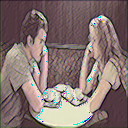

In [13]:
ou_im

In [14]:
%%timeit
x = conv_forward_fast(im, w_conv1, b_conv1, conv_param=conv_param_x3)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv2, b_conv2, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv3, b_conv3, conv_param=conv_param_x1)
x = np.maximum(x, 0)
x = conv_forward_fast(x, w_conv4, b_conv4, conv_param=conv_param_x3)
oui = np.maximum(x  + im, 0)

1 loop, best of 3: 1.23 s per loop
